In [92]:
from google.colab import files
uploaded = files.upload()

Saving Test_Tom_and_Jerry.mp4 to Test_Tom_and_Jerry.mp4


In [0]:
import cv2 
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation

Generating Dataset from video

In [0]:
count = 0
videoFile = "Train_Tom_and_jerry (1).mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
# img = plt.imread('frame125.jpg')   # reading image using its name
# plt.imshow(img)

In [0]:
# count = 0
# videoFile = "Test_Tom_and_jerry.mp4"
# cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
# frameRate = cap.get(5) #frame rate
# x=1
# while(cap.isOpened()):
#     frameId = cap.get(1) #current frame number
#     ret, frame = cap.read()
#     if (ret != True):
#         break
#     if (frameId % math.floor(frameRate) == 0):
#         filename ="frame_test%d.jpg" % count;count+=1
#         cv2.imwrite(filename, frame)
# cap.release()

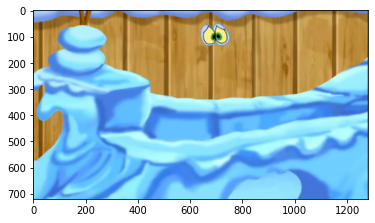

In [230]:
img = plt.imread('frame33.jpg')   # reading image using its name
plt.imshow(img)

In [231]:
data = pd.read_csv('mapping.csv')

data.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


Data Pre-processing

[array([[[  0,  43,   0],
        [134, 178, 129],
        [161, 205, 156],
        ...,
        [170, 203, 160],
        [144, 177, 134],
        [  6,  39,   0]],

       [[  0,  43,   0],
        [134, 178, 129],
        [161, 205, 156],
        ...,
        [170, 203, 160],
        [144, 177, 134],
        [  6,  39,   0]],

       [[  0,  43,   0],
        [134, 178, 129],
        [161, 205, 156],
        ...,
        [170, 203, 160],
        [144, 177, 134],
        [  6,  39,   0]],

       ...,

       [[  6,   6,  16],
        [ 79,  79,  87],
        [103, 104, 108],
        ...,
        [ 46,  71,  68],
        [ 47,  67,  66],
        [  0,  13,  13]],

       [[  6,   6,  16],
        [ 79,  79,  87],
        [103, 104, 108],
        ...,
        [ 46,  71,  68],
        [ 47,  67,  66],
        [  0,  13,  13]],

       [[  6,   6,  16],
        [ 79,  79,  87],
        [103, 104, 108],
        ...,
        [ 46,  71,  68],
        [ 47,  67,  66],
        [  0,  12,  12]

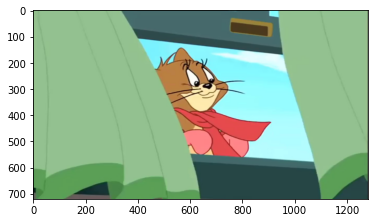

In [232]:
X = []
for img_name in data.Image_ID:
    img = plt.imread(''+ img_name)
    X.append(img)

plt.imshow(X[0])
print(X)

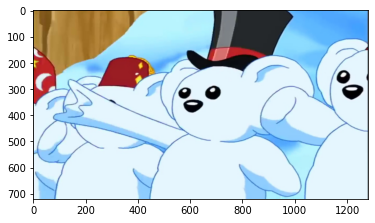

In [233]:
plt.imshow(X[79])

(720, 1280, 3)


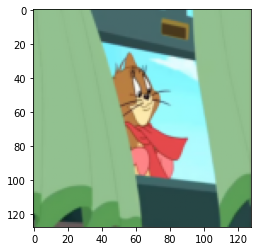

In [234]:
X = np.array(X)

# X = X/255.
y = data.Class
dummy_y = tf.keras.utils.to_categorical(y)
# print(type(X))
# img = plt.imread(X[0])
print(X[0].shape)
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], (128,128))
    image.append(a)
plt.imshow(image[0])
# X = np.array(image)

# X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.3) #split the dataset

In [0]:
print(X_train[0])

(298, 128, 128, 3)
[0. 1. 0.]


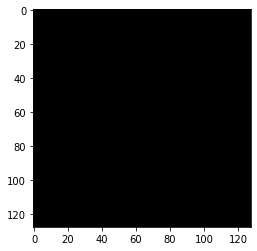

In [238]:
X = np.array(image)
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=42) #split the dataset
# print(Y_train.shape)
print(Y_train[8])
plt.imshow(X_train[8])

X_temp = X_train/255.
plt.imshow(X_temp[8])

Building the Model

In [199]:
print(X_train[0])

[[[0.40392157 0.30588235 0.29019608]
  [0.40392157 0.30588235 0.29019608]
  [0.38553922 0.28615196 0.27046569]
  ...
  [0.78823529 0.62352941 0.42745098]
  [0.8        0.63529412 0.43529412]
  [0.80392157 0.63333333 0.41568627]]

 [[0.40968137 0.31164216 0.29595588]
  [0.40392157 0.30588235 0.29019608]
  [0.40759804 0.30955882 0.29387255]
  ...
  [0.78823529 0.62352941 0.42745098]
  [0.8        0.63529412 0.43529412]
  [0.80392157 0.63333333 0.41568627]]

 [[0.40784314 0.30980392 0.29411765]
  [0.41176471 0.3120098  0.29632353]
  [0.41789216 0.31764706 0.30196078]
  ...
  [0.79215686 0.62352941 0.43137255]
  [0.80392157 0.63529412 0.43921569]
  [0.81004902 0.63529412 0.42156863]]

 ...

 [[0.56078431 0.42352941 0.29803922]
  [0.56470588 0.42352941 0.30196078]
  [0.58235294 0.43615196 0.32156863]
  ...
  [0.69803922 0.54509804 0.38039216]
  [0.70306373 0.55208333 0.38713235]
  [0.70588235 0.5560049  0.39889706]]

 [[0.56470588 0.42352941 0.29803922]
  [0.56470588 0.42352941 0.30183824]


In [239]:
print(X_train.shape)
print(Y_train.shape)
# print(X_train[0])

(208, 128, 128, 3)
(208, 3)


In [240]:
# batch_size = 16
# epochs = 5

# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(256, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax)) #use softmax for probability distribution

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100)
model.summary()

Epoch 1/100
7/7 [==============================] - 1s 118ms/step - loss: 53.6220 - accuracy: 0.4471
Epoch 2/100
7/7 [==============================] - 1s 119ms/step - loss: 14.8976 - accuracy: 0.5192
Epoch 3/100
7/7 [==============================] - 1s 118ms/step - loss: 9.8600 - accuracy: 0.5817
Epoch 4/100
7/7 [==============================] - 1s 120ms/step - loss: 11.3597 - accuracy: 0.6010
Epoch 5/100
7/7 [==============================] - 1s 119ms/step - loss: 8.8845 - accuracy: 0.5913
Epoch 6/100
7/7 [==============================] - 1s 120ms/step - loss: 7.7871 - accuracy: 0.5962
Epoch 7/100
7/7 [==============================] - 1s 119ms/step - loss: 7.0192 - accuracy: 0.6875
Epoch 8/100
7/7 [==============================] - 1s 118ms/step - loss: 2.2830 - accuracy: 0.7837
Epoch 9/100
7/7 [==============================] - 1s 120ms/step - loss: 3.3683 - accuracy: 0.7308
Epoch 10/100
7/7 [==============================] - 1s 119ms/step - loss: 4.2221 - accuracy: 0.6875
Epoch 

In [0]:
X_test_temp = X_test/255.

In [241]:
score = model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 30ms/step - loss: 1.2422 - accuracy: 0.8000


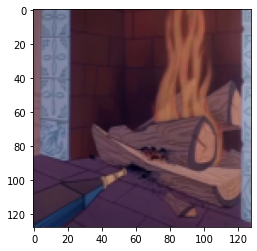

In [242]:
plt.imshow(X_test[0])